Júlio Cézar de Souza Barbosa (1904612)

Rickson das Neves Tavares (2072486)

# Avaliação 1 - Introdução e Fundamentação Teórica (Primeira parte): Descrição do Problema (2 Pontos)

### Redução de Churn com Machine Learning

Um dos maiores problemas de parte das empresas é a ocorrência de Churn, ou seja, perda de clientes.
Aquisição de novos clientes custa mais caro do que manter os já existentes.
Churn é a perda de cliente ou cancelamento de serviço, é quando o cliente corta o relacionamento com a empresa.
Essa desistência pode ser pela insatisfação do produto, mau atendimento, óbito, quebra de contrato, dentre outros.

### Objetivo

Esse projeto tem como objetivo aplicar algoritmos de machine learning para prever e identificar as características dos clientes com risco de Churn.

### Especificação Técnica

Dataset: Para desenvolvimento desse projeto, será utilizado o dataset chamado Churn_Modelling que contém dados de clientes de uma agência bancária, disponível em: < https://www.kaggle.com/shubh0799/churn-modelling?select=Churn_Modelling.csv >.

Formato: A base de dados está em formato CSV, estando divivida em 14(catorze) colunas, conforme abaixo:

RowNumber:       número da linha

CustomerId:      identificação do cliente;

Surname:         sobrenome do cliente;

CreditScore:     pontuação de credito, 0 alto risco de inadimplência e 1000 clientes com baixo risco de inadimplência;

Geography:       país que o serviço é oferecido;

Gender:          sexo do cliente;

Age:             idade do cliente;

Tenure:          um indicativo de estabilidade no emprego, em que 0 significa pouca estabilidade e 10 muita estabilidade.

Balance:         saldo da conta corrente;

NumOfProducts:   número de produtos bancários adquiridos;

HasCrCard:       se tem cartão de credito ou não, (Sim = 1 e Não = 0);

IsActiveMember:  se é um cliente com conta ativa, (Ativo = 1) ;

EstimatedSalary: salário estimado;

Exited:          cliente deixou de ser cliente do banco ou não (Churn = 1).


Métodos de Pŕe-processamento: A príncipio parece ser um dataset pequeno, entretanto, como se trata de dados textuais há o desafio de tratar esses dados. Sendo assim, destaca-se como os pré-processsamento os seguintes:

Limpeza da base, onde serão removidos termos do corpo do e-mail como e , remoção de espaços em branco e remoção de caracteres especiais.
Remoção de stop-words: remover as ditas palavras de parada, como uma forma de otimizar o desempenho dos algoritmos
Transformação para Bag of Words: Tendo como objetivo fazer com que os dados sejam compreendidos, será realizado a transformação do texto para Bag of Words
Tarefa de Aprendizado: Será aplicado a tarefa de Classificação

Algoritmos Avaliados: Para prever os clientes em risco de Churn iremos utilizar o modelo KNN, Random Forest e XGBost.

# Avaliação 2 - Metodologia, Resultados e Discussão (Segunda parte): Preparação dos Dados (2 Pontos)

### Importando os dados

In [2]:
#Importando a biblioteca Pandas
import pandas as pd

In [3]:
#Importando o dataset
url= "https://raw.githubusercontent.com/JulioCSBpy/Dataset_Churn/main/dataset/Churn_Modelling.csv"
dados = pd.read_csv(url)

In [4]:
#Visualizando as 10 primeiras linhas do dataset
dados.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [7]:
#Renomeando as colunas
dados.columns = ['N°', 'ID_Cliente', 'Sobrenome', 'Pontuação', 'País', 'Gênero', 'Idade', 'Estabilidade', 'Saldo', 
                'N°_de_Produtos', 'Possui_Cartão', 'Tem_Conta_Ativa', 'Salário', 'Churn']

In [8]:
#Visualizando as 10 últimas linhas do dataset
dados.tail(10)

,N°,ID_Cliente,Sobrenome,Pontuação,País,Gênero,Idade,Estabilidade,Saldo,N°_de_Produtos,Possui_Cartão,Tem_Conta_Ativa,Salário,Churn
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Identificando as váriaveis

In [9]:
#Utilizando o método DataFrame.info() para obter informações sobre as variáveis
pd.DataFrame.info(dados)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   N°               10000 non-null  int64  
 1   ID_Cliente       10000 non-null  int64  
 2   Sobrenome        10000 non-null  object 
 3   Pontuação        10000 non-null  int64  
 4   País             10000 non-null  object 
 5   Gênero           10000 non-null  object 
 6   Idade            10000 non-null  int64  
 7   Estabilidade     10000 non-null  int64  
 8   Saldo            10000 non-null  float64
 9   N°_de_Produtos   10000 non-null  int64  
 10  Possui_Cartão    10000 non-null  int64  
 11  Tem_Conta_Ativa  10000 non-null  int64  
 12  Salário          10000 non-null  float64
 13  Churn            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Observa-se 14 variáveis(colunas) e 1000 observações(linhas), na qual os dados se enquadram em duas categorias:

Variáveis categóricas: sexo, país, cartão de crédito, clientes ativos e saída do cliente.

Variáveis numéricas: escore do cliente, idade, estabilidade, saldo, número de produtos, salário estimado.

Utilizando a variável 'Churn', identificaremos o perfil de clientes que cancelaram o serviço com a agência bancária e tentaremos prever clientes com risco de Churn.

### Análise Exploratória dos Dados

In [10]:
#Obtendo medidas descritivas das vriáveis
dados.describe()

,N°,ID_Cliente,Pontuação,Idade,Estabilidade,Saldo,N°_de_Produtos,Possui_Cartão,Tem_Conta_Ativa,Salário,Churn
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


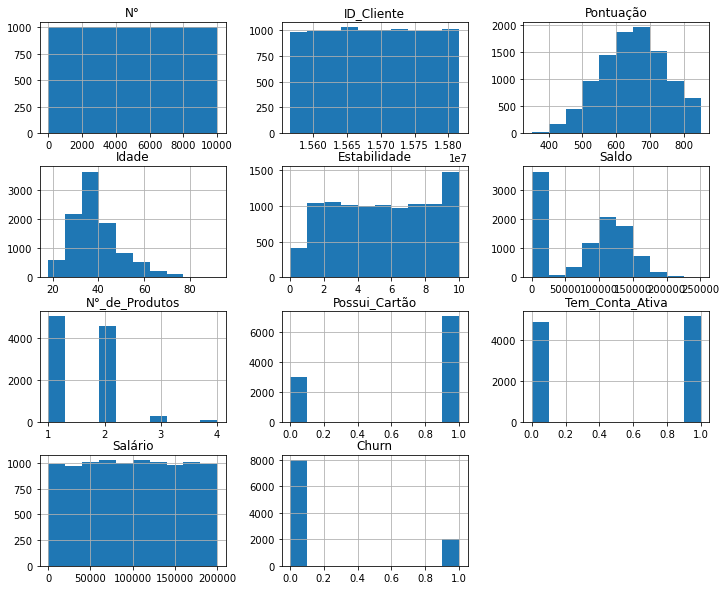

In [11]:
#Plotando uma distribuição de cada variável para obter uma visão geral e possíveis outliers(valores discrepantes)
dados.hist(figsize=(12,10));

In [12]:
#Porcentagem de clientes que sairam do banco
dados['Churn'].sum()/dados['Churn'].count()

0.2037

In [14]:
#Analisando a variável Gênero
dados_plot= dados.groupby('Gênero').Churn.mean().reset_index()
dados_plot

,Gênero,Churn
0,Female,0.250715
1,Male,0.164559


## Pré-Processamento dos dados

In [15]:
#Eliminando variáveis irrelevantes
dados = dados.drop(columns = ['N°','ID_Cliente','Sobrenome'])
dados

,Pontuação,País,Gênero,Idade,Estabilidade,Saldo,N°_de_Produtos,Possui_Cartão,Tem_Conta_Ativa,Salário,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [16]:
#Identificando dados faltantes
dados.isnull().sum()

Pontuação          0
País               0
Gênero             0
Idade              0
Estabilidade       0
Saldo              0
N°_de_Produtos     0
Possui_Cartão      0
Tem_Conta_Ativa    0
Salário            0
Churn              0
dtype: int64

In [17]:
#Criando variáveis dependentes 'Churn' e independentes
y = dados['Churn']
x = dados.drop('Churn', axis = 1)
x

,Pontuação,País,Gênero,Idade,Estabilidade,Saldo,N°_de_Produtos,Possui_Cartão,Tem_Conta_Ativa,Salário
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [18]:
#Criando variáveis numéricas
x_num = ['Pontuação', 'Saldo', 'Idade', 'Salário', 'Estabilidade']
x_num

['Pontuação', 'Saldo', 'Idade', 'Salário', 'Estabilidade']

In [19]:
#Criando variáveis categóricas
x_cat = list(set(x)-set(x_num))
x_cat
x_dummies=x[x_cat]
x_dummies

,Tem_Conta_Ativa,N°_de_Produtos,Possui_Cartão,País,Gênero
0,1,1,1,France,Female
1,1,1,0,Spain,Female
2,0,3,1,France,Female
3,0,2,0,France,Female
4,1,1,1,Spain,Female
...,...,...,...,...,...
9995,0,2,1,France,Male
9996,1,1,1,France,Male
9997,1,1,0,France,Female
9998,0,2,1,Germany,Male


## Processamento das Variáveis Categóricas

In [20]:
#Substituindo a variável sexo para 0 e 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Gênero'] = le.fit_transform(x['Gênero']) 
x.head(10)

,Pontuação,País,Gênero,Idade,Estabilidade,Saldo,N°_de_Produtos,Possui_Cartão,Tem_Conta_Ativa,Salário
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71
6,822,France,1,50,7,0.00,2,1,1,10062.80
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88
8,501,France,1,44,4,142051.07,2,0,1,74940.50
9,684,France,1,27,2,134603.88,1,1,1,71725.73


In [21]:
#Dummificando variáveis categóricas com mais de 2 categorias
x_final = pd.get_dummies (data = x, columns=['País','N°_de_Produtos'] )
x_final

,Pontuação,Gênero,Idade,Estabilidade,Saldo,Possui_Cartão,Tem_Conta_Ativa,Salário,País_France,País_Germany,País_Spain,N°_de_Produtos_1,N°_de_Produtos_2,N°_de_Produtos_3,N°_de_Produtos_4
0,619,0,42,2,0.00,1,1,101348.88,1,0,0,1,0,0,0
1,608,0,41,1,83807.86,0,1,112542.58,0,0,1,1,0,0,0
2,502,0,42,8,159660.80,1,0,113931.57,1,0,0,0,0,1,0
3,699,0,39,1,0.00,0,0,93826.63,1,0,0,0,1,0,0
4,850,0,43,2,125510.82,1,1,79084.10,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,1,0,96270.64,1,0,0,0,1,0,0
9996,516,1,35,10,57369.61,1,1,101699.77,1,0,0,1,0,0,0
9997,709,0,36,7,0.00,0,1,42085.58,1,0,0,1,0,0,0
9998,772,1,42,3,75075.31,1,0,92888.52,0,1,0,0,1,0,0


## Processamento das Variáveis Numéricas

In [22]:
#Utilizando o método MiniMax para Padronizar(deixar na mesma escala de grandeza) as variáveis Numéricas Contínuas
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_final[x_num] = scaler.fit_transform(x_final[x_num])
x_final[x_num]

,Pontuação,Saldo,Idade,Salário,Estabilidade
0,0.538,0.000000,0.324324,0.506735,0.2
1,0.516,0.334031,0.310811,0.562709,0.1
2,0.304,0.636357,0.324324,0.569654,0.8
3,0.698,0.000000,0.283784,0.469120,0.1
4,1.000,0.500246,0.337838,0.395400,0.2
...,...,...,...,...,...
9995,0.842,0.000000,0.283784,0.481341,0.5
9996,0.332,0.228657,0.229730,0.508490,1.0
9997,0.718,0.000000,0.243243,0.210390,0.7
9998,0.844,0.299226,0.324324,0.464429,0.3


## Particionando os Dados em Treino/Teste

In [23]:
# Separando em dados teste e treinamento 
from sklearn.model_selection import train_test_split 

x_treino, x_teste, y_treino,y_teste  = train_test_split(x_final, y, test_size = 0.25,random_state = 1)
x_treino

,Pontuação,Gênero,Idade,Estabilidade,Saldo,Possui_Cartão,Tem_Conta_Ativa,Salário,País_France,País_Germany,País_Spain,N°_de_Produtos_1,N°_de_Produtos_2,N°_de_Produtos_3,N°_de_Produtos_4
651,0.740,1,0.459459,0.7,0.000000,1,1,0.073855,1,0,0,1,0,0,0
6560,0.454,0,0.189189,0.1,0.000000,1,0,0.049459,1,0,0,0,1,0,0
8974,0.712,0,0.337838,0.1,0.000000,1,0,0.159771,0,0,1,0,1,0,0
2348,0.948,1,0.364865,0.3,0.514988,0,0,0.300730,1,0,0,1,0,0,0
5670,0.294,1,0.189189,0.8,0.000000,1,0,0.336796,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0.542,1,0.391892,0.7,0.427916,1,1,0.333970,0,1,0,1,0,0,0
7813,0.668,0,0.608108,0.3,0.323820,1,0,0.348192,0,1,0,1,0,0,0
905,0.644,0,0.364865,0.9,0.000000,1,1,0.460124,1,0,0,1,0,0,0
5192,0.626,0,0.283784,0.8,0.000000,1,1,0.505835,1,0,0,0,1,0,0


# Avaliação 3 - Avaliação do Projeto de Ensino (Paper): Avaliação dos métodos e predição (3 Pontos)

## Modelo KNN

Modelo mais simples de aprendizado supervisiona, mas nem por isso ele perde em relação ao seu desempenho.

KNN ou k-vizinhos mais próximo utiliza como base para prever as classes, os vizinhos mais próximo, ou seja, as observações mais próximas serão a base para prever essa nova observação.

Para facilitar o entendimento, ilustramos o método através de um exemplo, figura a seguir. O interesse é prever se o círculo verde é um triângulo vermelho ou um quadrado azul.

Primeiro, escolhemos o número de k vizinhos, k precisa ser um número inteiro e impar. Depois medimos a distância da nova observação (círculo verde) com os pontos do dataset (triângulos e quadrados).

Para finalizar, ordenamos as distâncias e escolhemos os k pontos mais próximos, se a maioria dos pontos mais próximos forem da categoria triãngulo vermelho, o ponto verde será classificado como triângulo, caso contrário será quadrado.

Observe que o método é bem influenciado pela escolha do K. Se escolhemos k=3, o círculo será classificado como triângulo vermelho. Se K=5, o círculo será classificado como quadrado azul.

Além disso, o algoritmo KNN, diferente dos outros algoritmos, tem seu poder computacional utilizado na amostra teste, quando precisamos prever uma nova observação e não para ajustar o modelo. Visto que as distâncias entre as observações só será calculada, quando incluímos uma nova observação.

In [ ]:
#Ajustando o modelo KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_treino, y_treino)

#### Métricas de Validação

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_teste, resultado_knn))

# Avaliação 4 - Socialização do Projeto de Ensino (Socialização): Socialização (2 Pontos)